In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv("data/spam.csv")

In [167]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [168]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [170]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [171]:
df.isna().sum()

Category    0
Message     0
dtype: int64

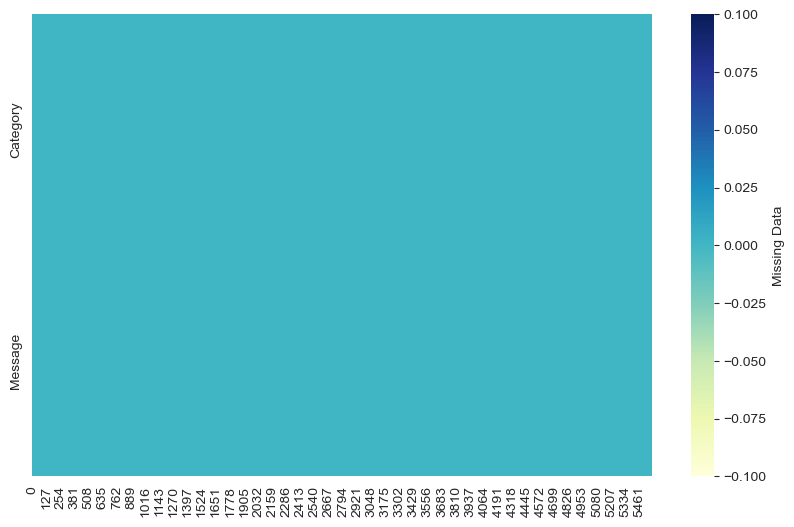

In [172]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()

In [173]:
df.loc[df['Category']=='spam','Category'] = 0
df.loc[df['Category']=='ham','Category'] = 1

In [174]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [175]:
X = df['Message']
Y = df['Category']

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [179]:
feature_extraction = TfidfVectorizer(lowercase=True,min_df=1,stop_words="english")

In [180]:
X_train_feature = feature_extraction.fit_transform(X_train)
X_test_feature = feature_extraction.transform(X_test)
#
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [181]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_feature,Y_train)

LogisticRegression()

In [182]:
from sklearn.metrics import accuracy_score
import math
prediction_on_model_train = model.predict(X_train_feature)
accuracy_on_training = accuracy_score(Y_train,prediction_on_model_train)
print(f'Accuracy on training data: {math.floor(accuracy_on_training * 100)}%')

Accuracy on training data: 96%


In [183]:
prediction_on_model_test = model.predict(X_test_feature)
accuracy_on_testing = accuracy_score(Y_test,prediction_on_model_test)
print(f'Accuracy on testing data: {math.floor(accuracy_on_testing * 100)}%')

Accuracy on testing data: 96%
